# Flood Prediction 🌊

# Setup

In [48]:
!pip install pycaret -q

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark",palette="deep")

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
train = pd.read_csv("./input/train.csv", index_col="id")
test = pd.read_csv("./input/test.csv", index_col="id")

X = train.drop(columns="FloodProbability")
y = train["FloodProbability"]

# Data in a glance

In [52]:
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [53]:
train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null  int6

📌 No missing values and all features are discrete values.

# EDA

## Correlation

In [55]:
def plot_correlation(corr_matrix):
    plt.figure(figsize=(12,8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    return sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", center=0)

<Axes: >

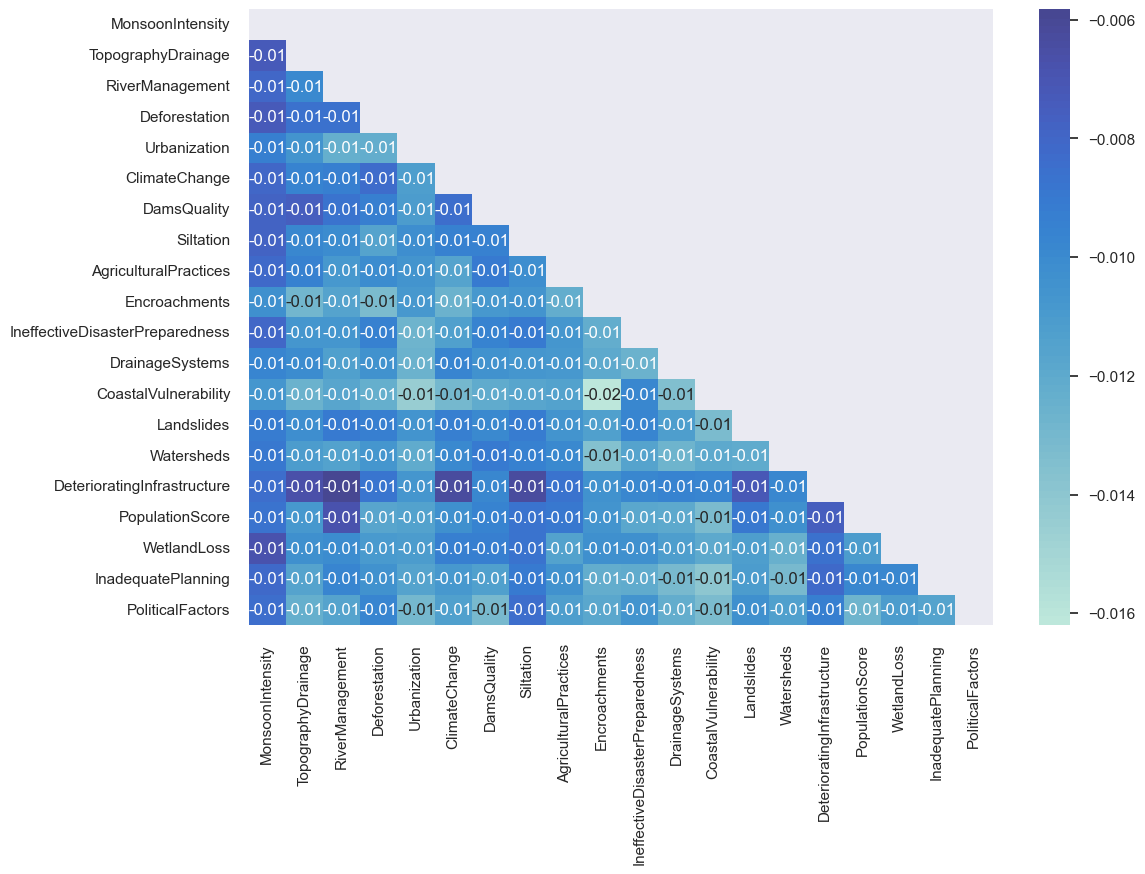

In [56]:
plot_correlation(X.corr())

<Axes: >

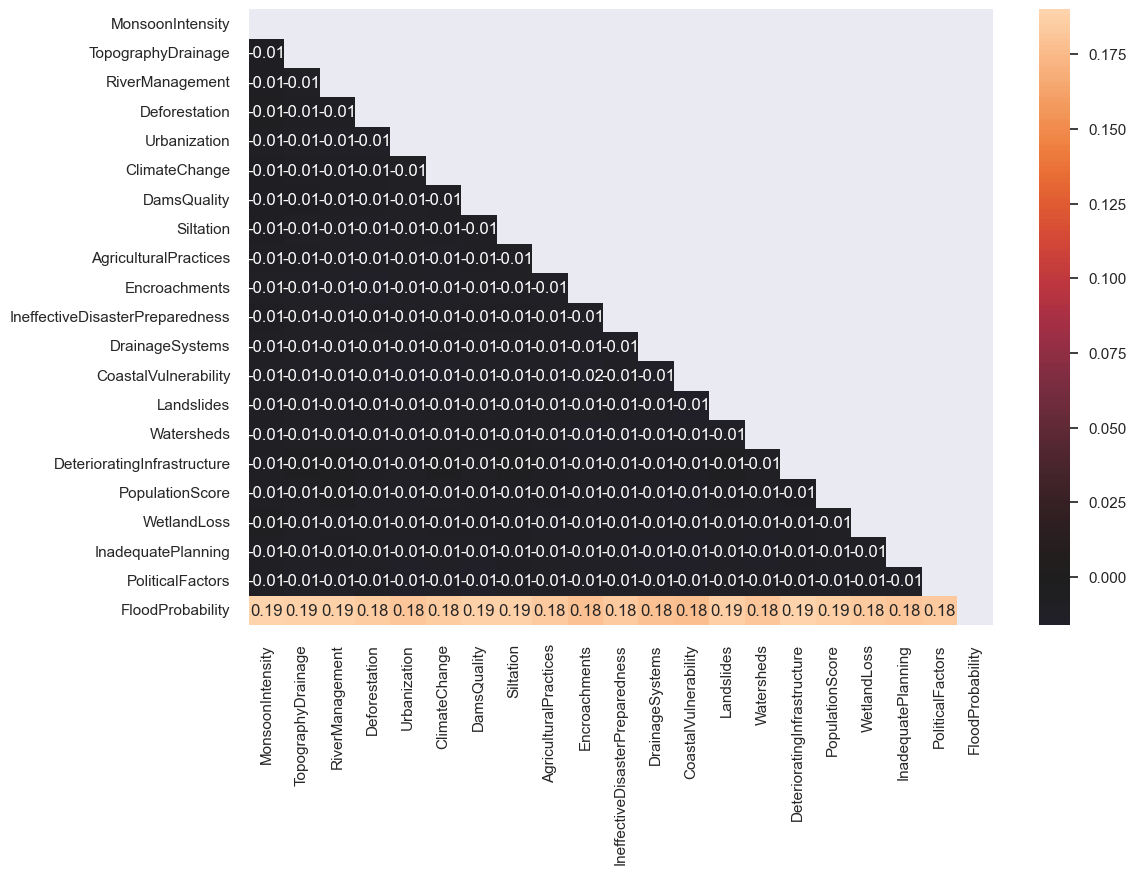

In [57]:
plot_correlation(train.corr())

## Mutual Information

<Axes: >

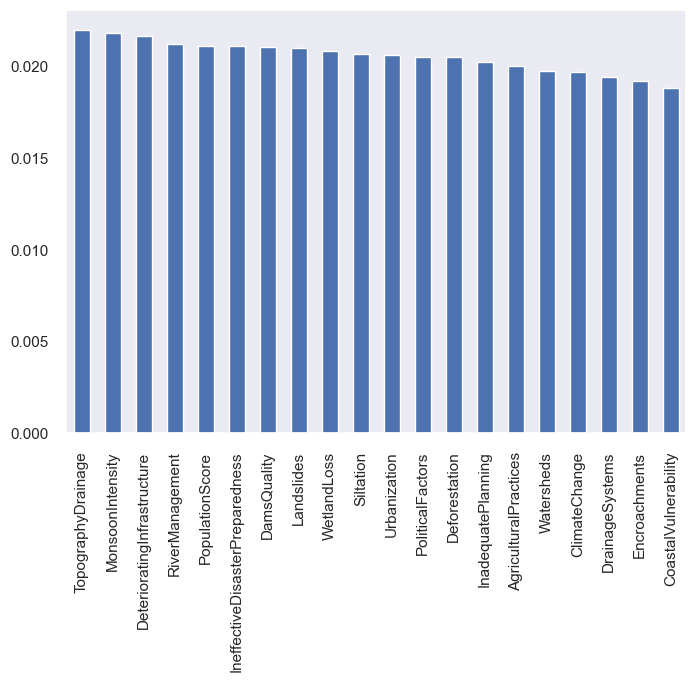

In [58]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, random_state=42, discrete_features=True)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

make_mi_scores(X, y).plot(kind='bar')

## Feature Distribution

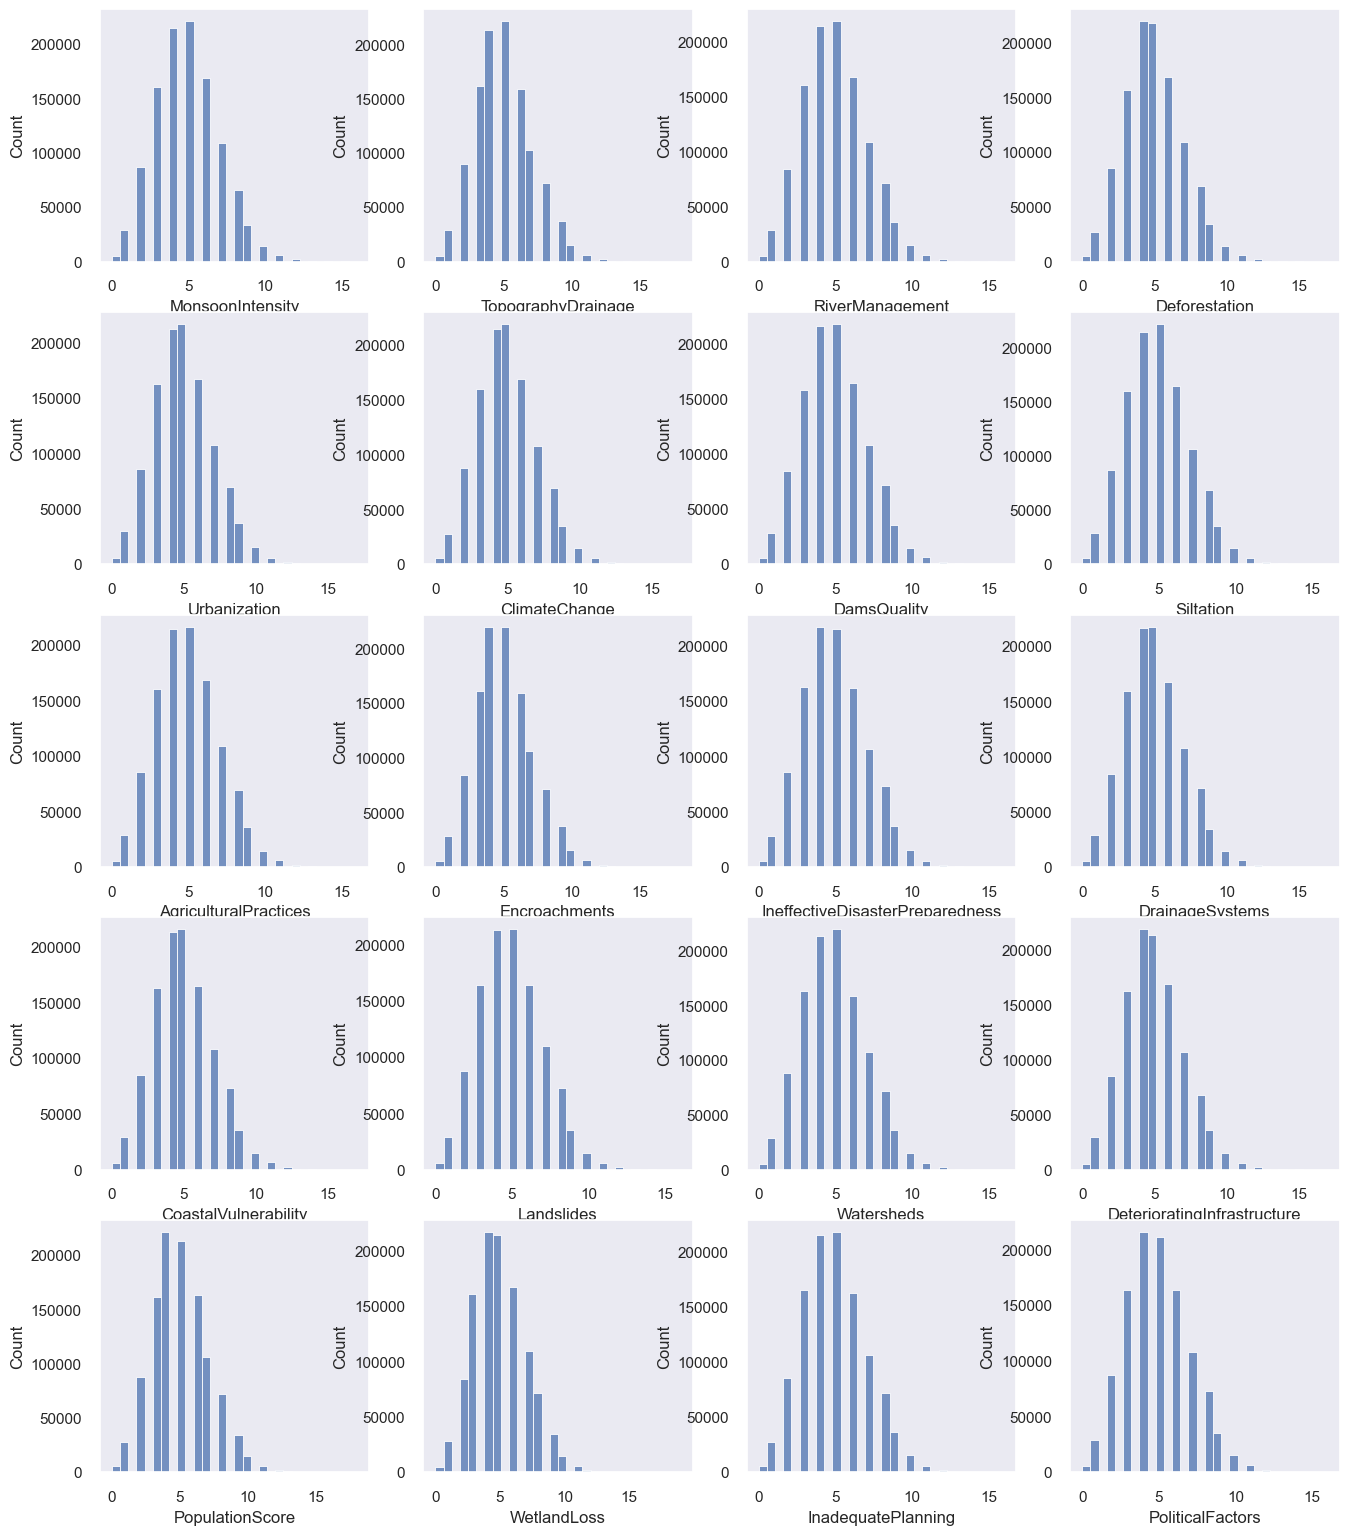

In [59]:
features = np.reshape(train.drop(columns="FloodProbability").columns, (5,4))

fig, axs = plt.subplots(5, 4, figsize=(16, 19))

for i in range(5):
    for j in range(4):
        sns.histplot(x=train[features[i][j]], bins=30, ax=axs[i][j])

## Target Distribution

<Axes: xlabel='FloodProbability', ylabel='Count'>

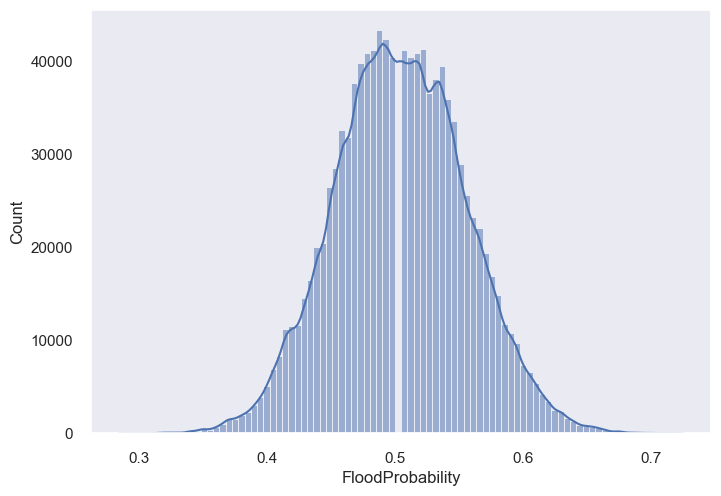

In [60]:
sns.histplot(x=train.FloodProbability, bins=90, kde=True)

# Feature Engineering

## Sum of Features

In [61]:
X['FeatureSum'] = X.sum(axis=1)
X['FeatureSum'].head()

id
0     94
1     94
2     99
3    104
4     72
Name: FeatureSum, dtype: int64

<Axes: xlabel='FeatureSum', ylabel='FloodProbability'>

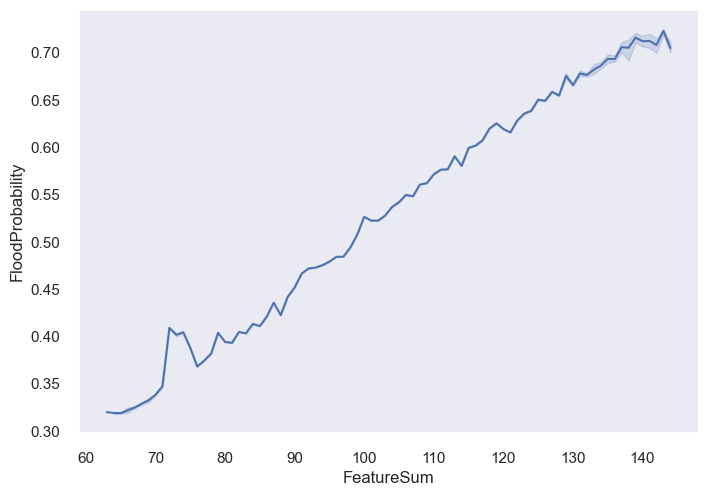

In [62]:
sns.lineplot(x=X.FeatureSum, y=y)

📌 Note that values between 72 and 76 lead to higher FloodProbability

<Axes: >

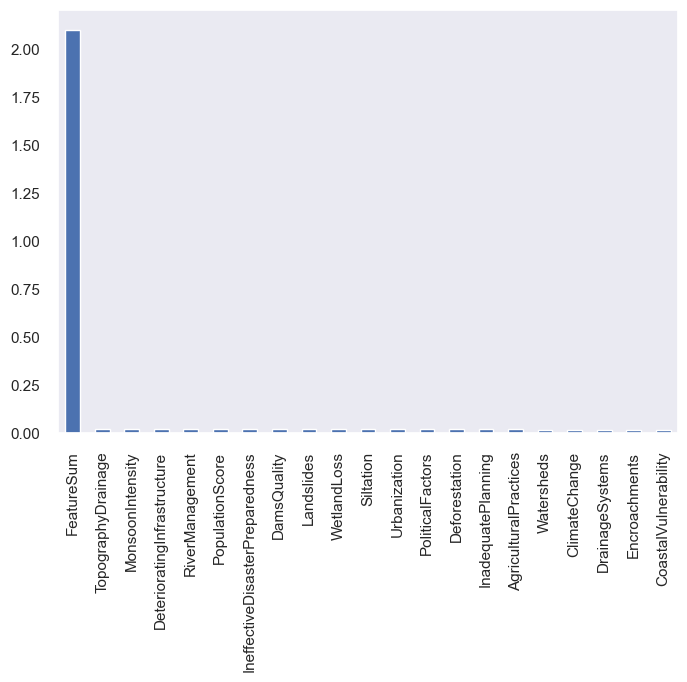

In [63]:
make_mi_scores(X, y).plot(kind='bar')

📌 That's definitely an improvement over other features. Thanks to [@AmbrosM](https://www.kaggle.com/ambrosm) for pointing it out [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499274).

## More Meta Features

In [64]:
X = X.copy()

original_features = X.drop(columns=["FeatureSum"]).columns

functions = {"FeatureStd": lambda df: df.std(), "FeatureMin": lambda df: df.min(),
             "FeatureMax": lambda df: df.max(), "FeatureMedian": lambda df: df.median()}

for feature_name, function in functions.items():
    X[feature_name] = X[original_features].apply(function, axis=1)
    
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FeatureSum,FeatureStd,FeatureMin,FeatureMax,FeatureMedian
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,4,7,5,7,3,94,1.750188,2,8,4.5
1,6,7,4,4,8,8,3,5,4,6,...,5,3,3,4,3,94,2.296450,0,9,4.0
2,6,5,6,7,3,7,1,5,4,5,...,6,8,2,3,3,99,1.932411,1,8,5.0
3,3,4,6,5,4,8,4,7,6,8,...,4,6,5,7,5,104,1.641565,2,8,5.0
4,5,3,2,6,4,4,3,3,3,3,...,4,1,2,3,5,72,1.500877,1,6,3.0


<Axes: >

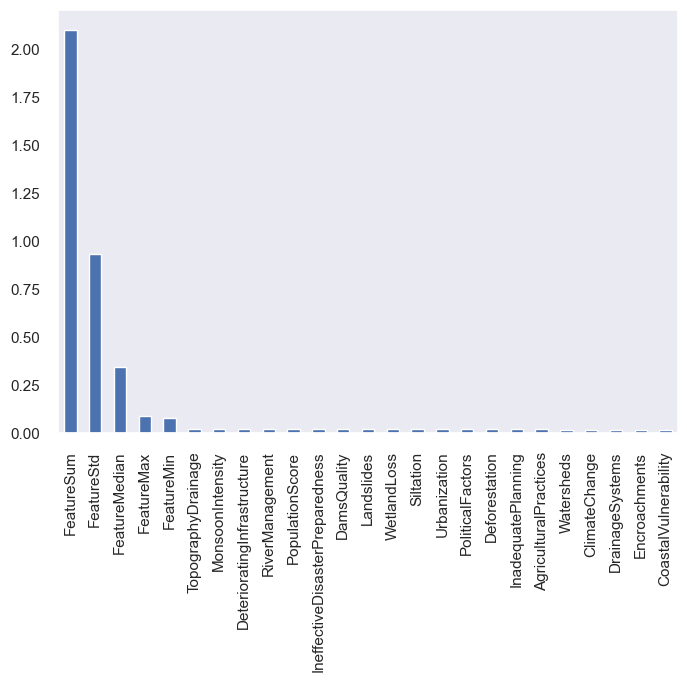

In [65]:
make_mi_scores(X, y).plot(kind='bar')

# Model Evaluation

## Set and train initial model

📌 Through PyCaret's ```compare_models()```, LGBM performed the best and fastest.

In [66]:
from pycaret.regression import *
experiment = setup(X, target=y, session_id=42, fold=10, preprocess=False)
lgbm = create_model('lightgbm')

,Description,Value
0,Session id,42
1,Target,FloodProbability
2,Target type,Regression
3,Original data shape,"(1117957, 26)"
4,Transformed data shape,"(1117957, 26)"
5,Transformed train set shape,"(782569, 26)"
6,Transformed test set shape,"(335388, 26)"
7,Numeric features,25


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:54:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0145,0.0003,0.0186,0.8669,0.0124,0.0291
1,0.0144,0.0003,0.0185,0.8697,0.0124,0.0290
2,0.0144,0.0003,0.0185,0.8682,0.0124,0.0290
3,0.0144,0.0003,0.0185,0.8688,0.0124,0.0290
4,0.0144,0.0003,0.0186,0.8680,0.0124,0.0290
5,0.0143,0.0003,0.0183,0.8706,0.0122,0.0288
6,0.0145,0.0003,0.0186,0.8670,0.0124,0.0291
7,0.0144,0.0003,0.0185,0.8677,0.0124,0.0290
8,0.0144,0.0003,0.0185,0.8684,0.0124,0.0291


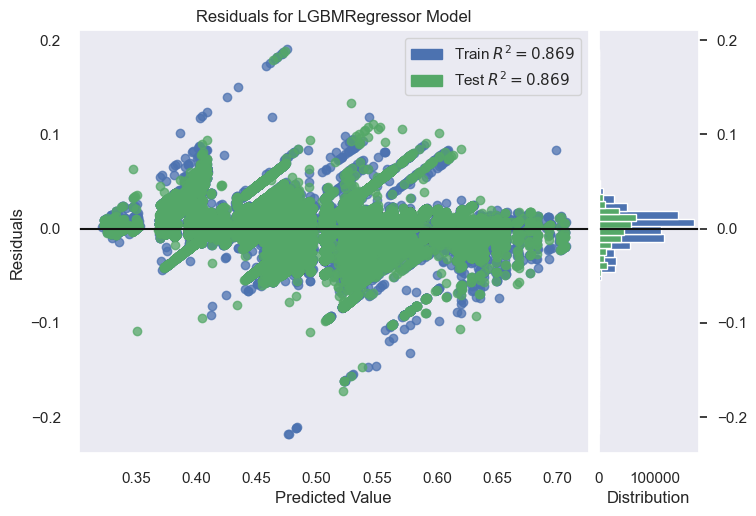

In [67]:
plot_model(lgbm)

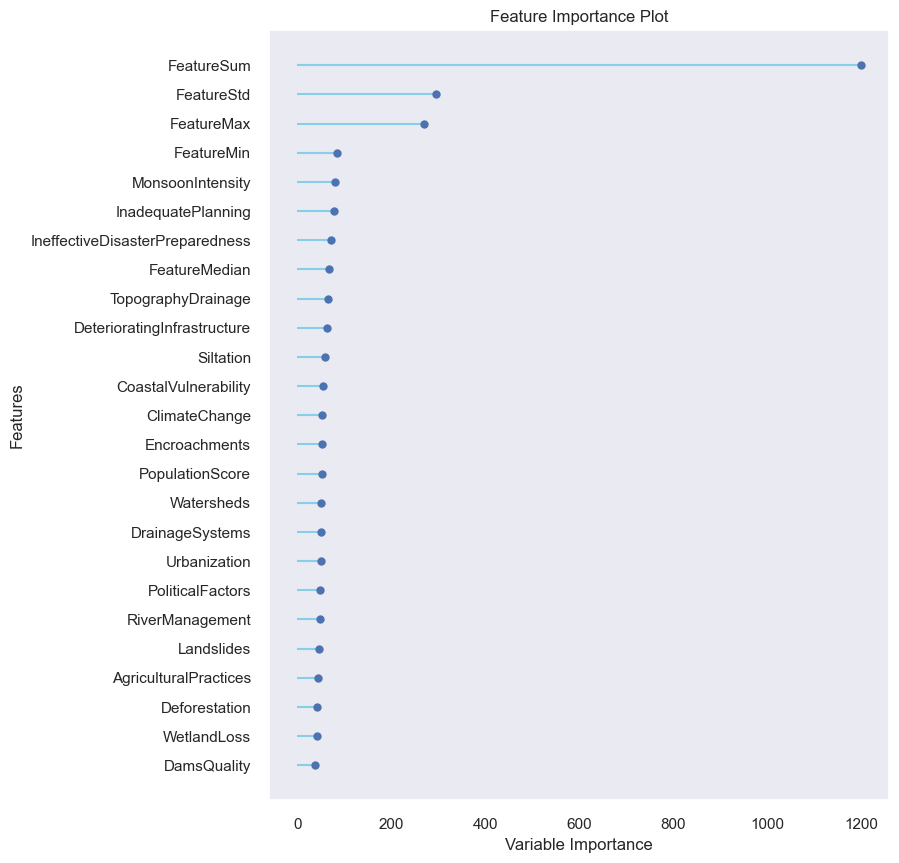

In [68]:
plot_model(lgbm, 'feature_all')

## Tune Model

In [69]:
tuned_lgbm = tune_model(lgbm, choose_better=True, fold=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:43
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:43
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0148,0.0004,0.0189,0.8629,0.0126,0.0298
1,0.0147,0.0004,0.0188,0.8655,0.0126,0.0296
2,0.0147,0.0004,0.0188,0.8639,0.0126,0.0296
3,0.0147,0.0004,0.0188,0.8647,0.0126,0.0296
4,0.0147,0.0004,0.0188,0.8639,0.0126,0.0297
5,0.0146,0.0003,0.0186,0.8665,0.0124,0.0294
6,0.0147,0.0004,0.0189,0.8627,0.0126,0.0297
7,0.0147,0.0004,0.0188,0.8633,0.0126,0.0296
8,0.0147,0.0004,0.0188,0.8642,0.0126,0.0296


# Final Prediction

In [70]:
# Feature Engineering

test_X = test.copy()

functions = {"FeatureSum": lambda df: df.sum(), "FeatureStd": lambda df: df.std(), "FeatureMin": lambda df: df.min(),
             "FeatureMax": lambda df: df.max(), "FeatureMedian": lambda df: df.median()}

for feature_name, function in functions.items():
    test_X[feature_name] = test_X[test_X.columns].apply(function, axis=1)

test_X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FeatureSum,FeatureStd,FeatureMin,FeatureMax,FeatureMedian
id,,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,...,3,6,4,4,5,111,23.064196,3.0,111.0,6.0
1117958,4,4,2,9,5,5,4,7,5,4,...,1,7,4,4,3,90,18.749857,1.0,90.0,4.0
1117959,1,3,6,5,7,2,4,6,4,2,...,2,3,6,8,3,90,18.787154,1.0,90.0,5.0
1117960,2,4,4,6,4,5,4,3,4,4,...,6,4,2,4,4,92,19.136104,2.0,92.0,4.0
1117961,6,3,2,4,6,4,5,5,3,7,...,6,8,4,5,5,92,19.136104,2.0,92.0,5.0


In [71]:
prediction = predict_model(lgbm, test_X)
prediction.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FeatureSum,FeatureStd,FeatureMin,FeatureMax,FeatureMedian,prediction_label
id,,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,...,6,4,4,5,111,23.064196,3.0,111.0,6.0,0.556362
1117958,4,4,2,9,5,5,4,7,5,4,...,7,4,4,3,90,18.749857,1.0,90.0,4.0,0.442245
1117959,1,3,6,5,7,2,4,6,4,2,...,3,6,8,3,90,18.787153,1.0,90.0,5.0,0.443923
1117960,2,4,4,6,4,5,4,3,4,4,...,4,2,4,4,92,19.136105,2.0,92.0,4.0,0.477942
1117961,6,3,2,4,6,4,5,5,3,7,...,8,4,5,5,92,19.136105,2.0,92.0,5.0,0.479319


In [72]:
submission = pd.DataFrame({"id": prediction.index, "FloodProbability": prediction.prediction_label})
submission.to_csv('submission.csv', index=False)
print("Successfully created csv")

Successfully created csv
